# Отчёт по домашнему заданию 1: Обработка и анализ изображений

### Студент: Крамин Мурат Тимурович

# Формулировка задания 1:
### 1. Загрузка и отображение изображения
- Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
- С помощью библиотек OpenCV или PIL загрузите изображение в программу.
- Отобразите исходное изображение.

### Реализация в виде кода:

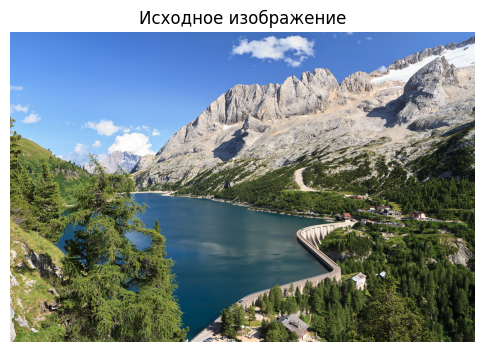

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Для корректного отображения RGB-изображений в matplotlib
def cv2_imshow_rgb(img_bgr, title="", size=(6, 6)):
    """ Отображает BGR-изображение (OpenCV) в правильном цвете (RGB) в matplotlib. """
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=size)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Загрузка и отображение изображения
original_img_bgr = cv2.imread('alps_mountains.jpg')  # загрузка в формате BGR

# Проверяем, что изображение загрузилось
if original_img_bgr is None:
    raise ValueError("Не удалось загрузить изображение. Проверьте путь к файлу.")

cv2_imshow_rgb(original_img_bgr, title="Исходное изображение")


## Выводы по заданию 1:

**Выбор и загрузка изображения:**
- Для примера было взято красочное пейзажное фото, на котором присутствуют горы, деревья, водоём и небо. Такое изображение с обилием деталей и разнообразием оттенков позволит провести целый спектр операций обработки. Мы загрузили его через библиотеку OpenCV, которая считывает данные в формате BGR.

**Отображение в правильном цвете:**  
- Чтобы избежать перепутанных цветов при показе в matplotlib, мы перевели изображение из BGR в RGB. После этого оно корректно отобразилось на экране: цвета не искажены, артефактов нет.

# Формулировка задания 2:

### 2. Преобразование цветовых пространств
- Преобразуйте изображение из **RGB** в **Grayscale** и **HSV**.
- Отобразите каждое из полученных изображений.
- Постройте гистограммы яркости для исходного и серого изображений.

### Реализация в виде кода:

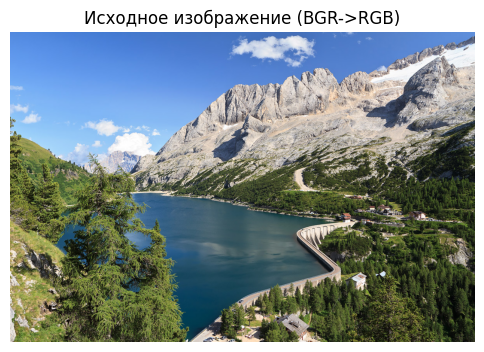

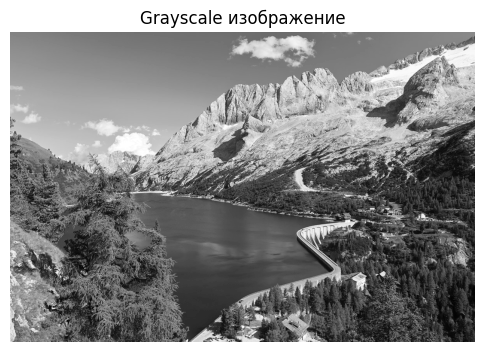

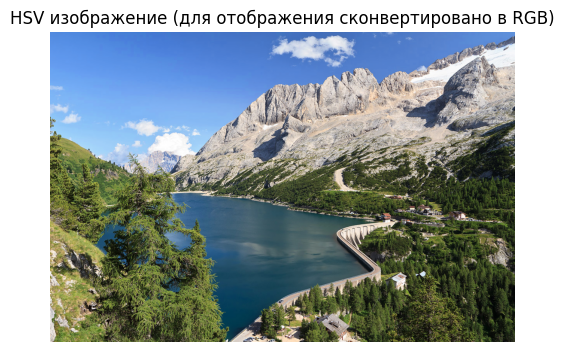

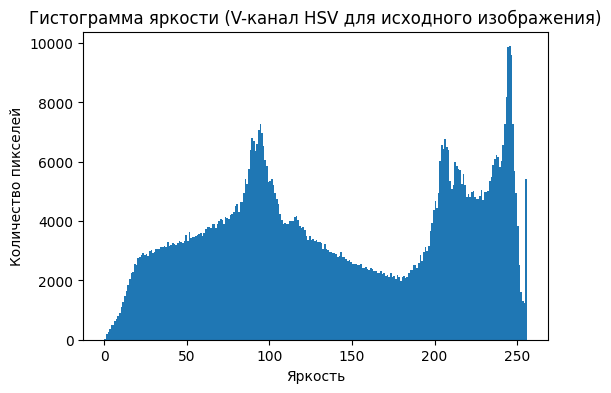

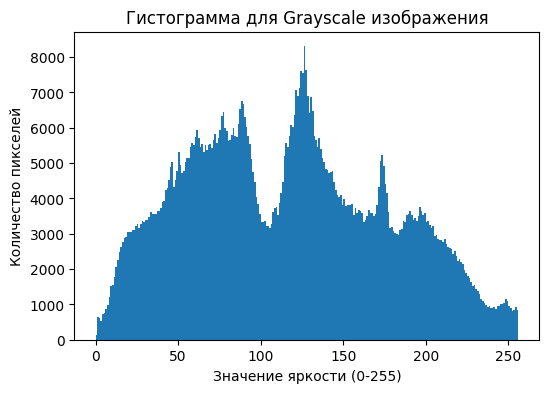

In [ ]:
# 2. Преобразование цветовых пространств
# Перевод в Grayscale
gray_img = cv2.cvtColor(original_img_bgr, cv2.COLOR_BGR2GRAY)

# Перевод в HSV
hsv_img = cv2.cvtColor(original_img_bgr, cv2.COLOR_BGR2HSV)

# Отобразим результаты
cv2_imshow_rgb(original_img_bgr, title="Исходное изображение (BGR->RGB)")
plt.figure(figsize=(6,6))
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale изображение")
plt.axis('off')
plt.show()

# Для отображения HSV переведём HSV->RGB
hsv_to_rgb = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
plt.figure(figsize=(6,6))
plt.imshow(hsv_to_rgb)
plt.title("HSV изображение (для отображения сконвертировано в RGB)")
plt.axis('off')
plt.show()

# Построим гистограммы яркости
# Для наглядности возьмём V-канал из HSV.
v_channel = hsv_img[:,:,2]  # канал V (Value)
gray_channel = gray_img

# Гистограмма канала V
plt.figure(figsize=(6,4))
plt.hist(v_channel.ravel(), bins=256, range=(0,256))
plt.title("Гистограмма яркости (V-канал HSV для исходного изображения)")
plt.xlabel("Яркость")
plt.ylabel("Количество пикселей")
plt.show()

# Гистограмма для Grayscale
plt.figure(figsize=(6,4))
plt.hist(gray_channel.ravel(), bins=256, range=(0,256))
plt.title("Гистограмма для Grayscale изображения")
plt.xlabel("Значение яркости (0-255)")
plt.ylabel("Количество пикселей")
plt.show()


## Выводы по заданию 2:


1. **Преобразование в Grayscale**  
   - Цветовая информация убирается, остаётся лишь яркостная компонента.  
   - Объекты сцены (например, небо, горы, озеро) хорошо различимы за счёт контраста в яркости.  
   - Grayscale упрощает обработку, сохраняя при этом чёткость структур и переходов яркости.  

2. **Преобразование в HSV**  
   - HSV (Hue, Saturation, Value) отделяет цвет (Hue и Saturation) от яркости (Value).  
   - Канал V (Value) используется для анализа освещённости и построения гистограммы яркости.  
   - При обратном переводе (HSV в RGB) теряется минимум информации, поэтому исходные цвета восстанавливаются достаточно точно.
   - HSV разложение полезно, когда нужно управлять цветами и их насыщенностью отдельно от яркости. 

3. **Анализ гистограмм**  
   - Гистограмма канала V показывает, как распределена яркость в исходном цветном изображении.  
   - Гистограмма Grayscale схожа, но учитывает взвешенную сумму каналов R, G и B, поэтому форма может немного отличаться.  
   - Широкий разброс по уровням серого (или V-канала) указывает на наличие и очень тёмных, и очень светлых областей (например, тени в горах и белые участки снега на вершинах).
   - Гистограммы помогают количественно оценить контраст и диапазон яркостей, что важно для правильной настройки алгоритмов.


# Формулировка задания 3:

### 3. Фильтрация изображений
- Примените к серому изображению следующие фильтры:
  - **Гауссово сглаживание** с разными значениями σ (сигма).
  - **Медианный фильтр** с разными размерами ядра.
  - **Фильтр Лапласа** для повышения резкости.
- Отобразите результаты фильтрации и сравните их визуально.

### Реализация в виде кода:

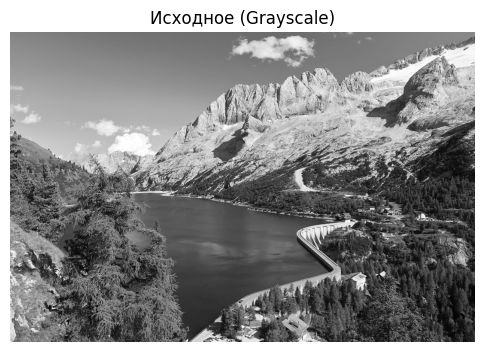

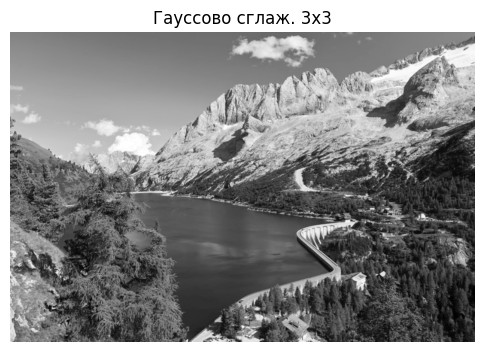

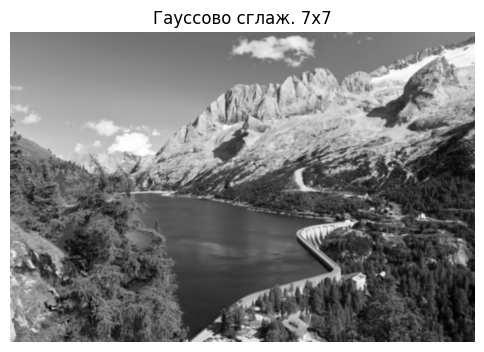

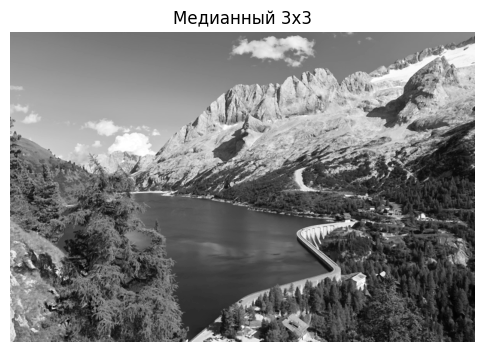

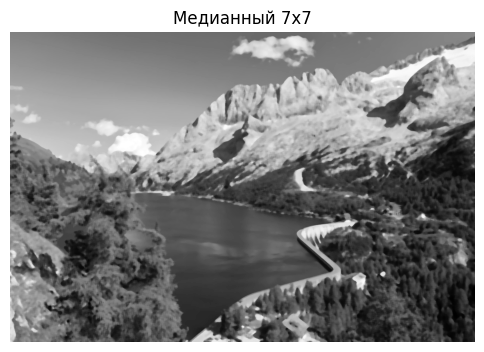

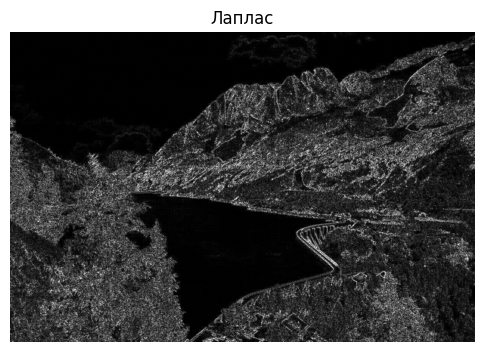

In [ ]:
# 3. Фильтрация изображений

# 3.1 Гауссово сглаживание (Gaussian Blur)
gaussian_blur_3 = cv2.GaussianBlur(gray_img, (3, 3), 0)   # ядро 3x3
gaussian_blur_7 = cv2.GaussianBlur(gray_img, (7, 7), 0)   # ядро 7x7

# 3.2 Медианный фильтр (Median Blur)
median_blur_3 = cv2.medianBlur(gray_img, 3)  # ядро 3x3
median_blur_7 = cv2.medianBlur(gray_img, 7)  # ядро 7x7

# 3.3 Фильтр Лапласа (Laplace)
laplacian = cv2.Laplacian(gray_img, ddepth=cv2.CV_64F) 
# Результат может получиться с плавающей точкой, нормализуем в 0..255
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Выводим результаты
images_to_show = [
    ("Исходное (Grayscale)", gray_img),
    ("Гауссово сглаж. 3x3", gaussian_blur_3),
    ("Гауссово сглаж. 7x7", gaussian_blur_7),
    ("Медианный 3x3", median_blur_3),
    ("Медианный 7x7", median_blur_7),
    ("Лаплас", laplacian_abs),
]

for i, (title, img) in enumerate(images_to_show, start=1):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


## Выводы по заданию 3:

1. **Гауссово сглаживание**  
   - При размере ядра 3×3 эффект сглаживания умеренный: шум снижается, при этом мелкие детали ещё читаются.  
   - При ядре 7×7 сглаживание заметно сильнее: изображение становится более размытым, теряется резкость, особенно в мелких структурах (ветви, мелкие детали гор).  
   - Подходит для удаления плавного подавления шума, но при увеличении ядра возрастает риск утраты важных контуров.

2. **Медианный фильтр**   
   - При 3×3 сохраняются чёткие границы, при этом мелкий шум сглаживается.  
   - При 7×7 сглаживание сильнее, иногда за счёт потери деталей и чёткости на границах. Тем не менее, границы остаются лучше, чем при Гауссовом блюре такой же силы, так как медиана не смазывает контуры, а срезает выбросы.
   - Медианный фильтр хорошо убирает точечный шум, сохраняя относительно чёткие границы, но при больших ядрах теряется мелкая фактура. 

3. **Фильтр Лапласа**  
   - Усиливает границы, выделяя зоны с резкими изменениями яркости.  
   - Получается карта контуров, которая акцентирует переходы между светлыми и тёмными участками.  
   - Не устраняет шум и не сглаживает изображение. При наличии шума он тоже может быть усилен, поэтому иногда нужно предварительное сглаживание перед применением Лапласа.

# Формулировка задания 4:

### 4. Выделение краев и углов
- Используйте **оператор Собеля** для определения горизонтальных и вертикальных градиентов.
- Примените **алгоритм Кэнни** для обнаружения краев.
- Используйте **детектор углов Harris** или **Shi-Tomasi** для выявления угловых точек.
- Наложите результаты на исходное изображение и отобразите.

### Реализация в виде кода:

C:\Users\Mi\AppData\Local\Temp\ipykernel_2892\2295291514.py:30: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


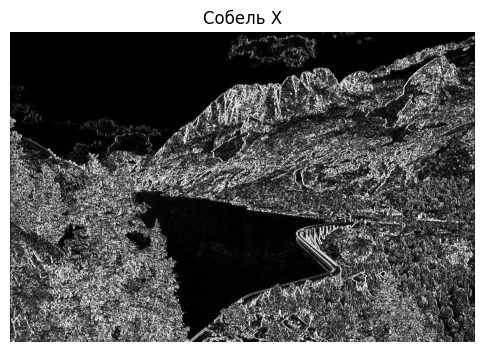

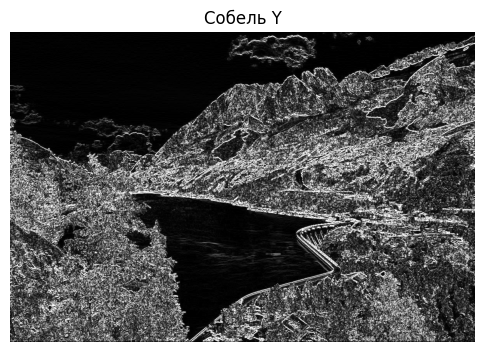

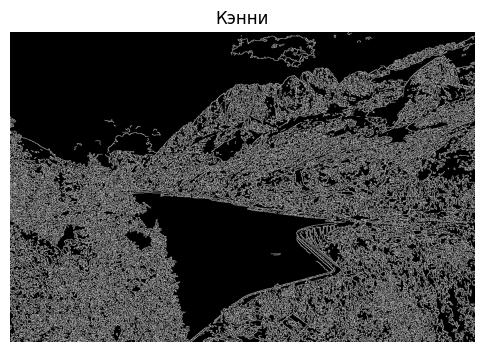

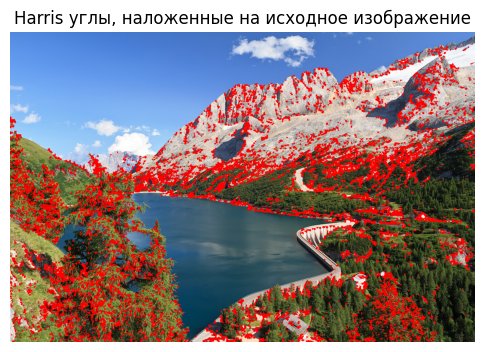

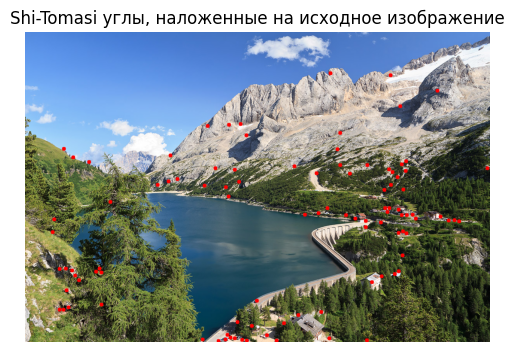

In [ ]:
# 4.1 Оператор Собеля
# Вычислим горизонтальные и вертикальные градиенты
sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)  # dx=1, dy=0
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)  # dx=0, dy=1

# Возьмём абсолютные значения и приведём к 8-битному формату
sobelx_abs = cv2.convertScaleAbs(sobelx)
sobely_abs = cv2.convertScaleAbs(sobely)

# 4.2 Алгоритм Кэнни (Canny)
canny_edges = cv2.Canny(gray_img, 100, 200)

# 4.3 Детектор углов Harris
gray_float = np.float32(gray_img)
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
harris_corners_dilated = cv2.dilate(harris_corners, None)

# Порог выделения углов
threshold_harris = 0.01 * harris_corners_dilated.max()

# Копию исходного изображения для рисования
harris_result = original_img_bgr.copy()
# Отметим углы красными точками
harris_result[harris_corners_dilated > threshold_harris] = [0, 0, 255] 

# 4.3 Альтернатива: Детектор Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray_float, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_result = original_img_bgr.copy()
if corners is not None:
    corners = np.int0(corners)
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(shi_tomasi_result, (x, y), 5, (0, 0, 255), -1)  # рисуем кружки

# 4.4 Визуализация результатов
plt.figure(figsize=(6,6))
plt.imshow(sobelx_abs, cmap='gray')
plt.title("Собель X")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(sobely_abs, cmap='gray')
plt.title("Собель Y")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(canny_edges, cmap='gray')
plt.title("Кэнни")
plt.axis('off')
plt.show()

# Переведём harris_result и shi_tomasi_result в RGB для корректного отображения
harris_result_rgb = cv2.cvtColor(harris_result, cv2.COLOR_BGR2RGB)
shi_tomasi_result_rgb = cv2.cvtColor(shi_tomasi_result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(harris_result_rgb)
plt.title("Harris углы, наложенные на исходное изображение")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(shi_tomasi_result_rgb)
plt.title("Shi-Tomasi углы, наложенные на исходное изображение")
plt.axis('off')
plt.show()


## Выводы по заданию 4:

1. **Оператор Собеля**  
   - **Собель X** определяет изменения яркости вдоль оси X, то есть выделяет вертикальные границы (контуры объектов, тянущиеся по вертикали).  
   - **Собель Y** реагирует на горизонтальные границы (градиент по оси Y).
   - **Операторы Собеля** выделяют границы по двум осям и дают первичное представление о структуре изображения.    

**2. Алгоритм Кэнни**  
   - Применяет умную фильтрацию, подавляет немаксимум и выдаёт тонкие, аккуратные контуры.  
   - Имеет пороги для определения, какие грани считать важными, поэтому даёт «чище» результат по сравнению с простым Собелем.

3. **Детектор углов Харриса**  
   - Определяет углы как области, где яркость меняется в двух направлениях, по сути, пересечение границ.  
   - Находит большое количество углов в местах сложных текстур: лиственная крона деревьев, рельефные поверхности гор, острые углы построек.  
   - Может давать множество точек, некоторые из которых могут оказаться менее значимыми для задач вроде трекинга объектов.

4. **Детектор углов Shi-Tomasi**  
   - Выбирает наиболее качественные углы, отбрасывая слабые и малоинформативные.  
   - Может быть полезен там, где нужно ограниченное, но надёжное подмножество ключевых точек.


# Формулировка задания 5:

### 5. Морфологические операции
- Бинаризуйте серое изображение с помощью **пороговой сегментации**.
- Примените **операции эрозии и дилатации** с различными структурными элементами.
- Отобразите результаты и объясните эффект каждой операции.

### Реализация в виде кода:

In [ ]:
# 5. Морфологические операции
# 5.1 Бинаризация через пороговую сегментацию
# OTSU-порог - автоматическое вычисление порога
ret, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(6,6))
plt.imshow(binary_img, cmap='gray')
plt.title(f"Бинаризованное изображение (OTSU порог={ret})")
plt.axis('off')
plt.show()

# 5.2 Эрозия и дилатация
# Создадим  kernel разного размера
kernel_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Применим эрозию
eroded_3 = cv2.erode(binary_img, kernel_3, iterations=1)
eroded_5 = cv2.erode(binary_img, kernel_5, iterations=1)

# Применим дилатацию
dilated_3 = cv2.dilate(binary_img, kernel_3, iterations=1)
dilated_5 = cv2.dilate(binary_img, kernel_5, iterations=1)

# Отобразим результаты
morph_results = [
    ("Оригинал (бинарное)", binary_img),
    ("Эрозия kernel 3x3", eroded_3),
    ("Эрозия kernel 5 (эллипс)", eroded_5),
    ("Дилатация kernel 3x3", dilated_3),
    ("Дилатация kernel 5 (эллипс)", dilated_5),
]

for title, img in morph_results:
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


## Выводы по заданию 5:

1. **Бинаризация (метод Отсу)**  
   - Определяет порог автоматически, основываясь на гистограмме яркости, чтобы минимизировать внутриклассовую дисперсию.  
   - Значения ниже порога становятся чёрными, выше порога — белыми. В нашем примере порог оказался в районе 116, что даёт разумное разделение неба/снега (светлые) и воды/растительности (тёмные).  
   - Потенциальный недостаток: полутоновые детали теряются, превращаясь в чёрное или белое.

2. **Эрозия**  
   - Съедает белые объекты, расширяя границы чёрных областей.  
   - При небольшом ядре (3×3) убираются тонкие выступы или шумовые белые точки, но основные объекты сохраняют форму.  
   - При большом (5×5, эллиптическом) исчезают многие мелкие белые элементы, а крупные объекты сильно уменьшаются по периметру.  
   - Используется для устранения мелких светлых шумов, отделения объектов, если нужно «очистить» фон.

3. **Дилатация**  
   - Обратна эрозии: расширяет белые области, «заливая» чёрные промежутки.  
   - При 3×3 заметно увеличение белых областей, а мелкие чёрные детали могут закрываться.  
   - При 5×5 объекты растут сильнее, слившиеся белые зоны могут формировать сплошные пятна.  
   - Полезна для склеивания разорванных белых областей или закрытия мелких дыр.

